<a href="https://colab.research.google.com/github/Mohammed-Fayaz-Ahamed/DataScience_assignment/blob/main/RandomForest_fraudCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [2]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

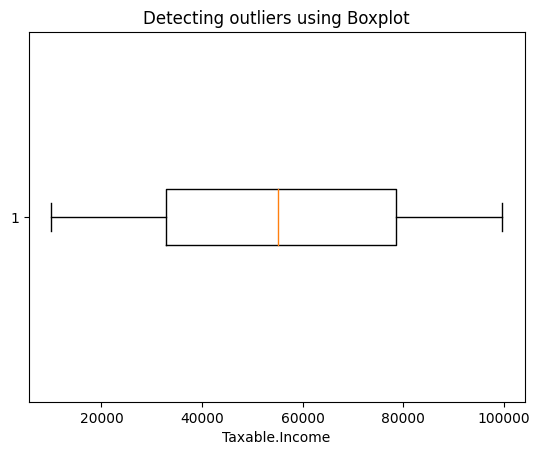

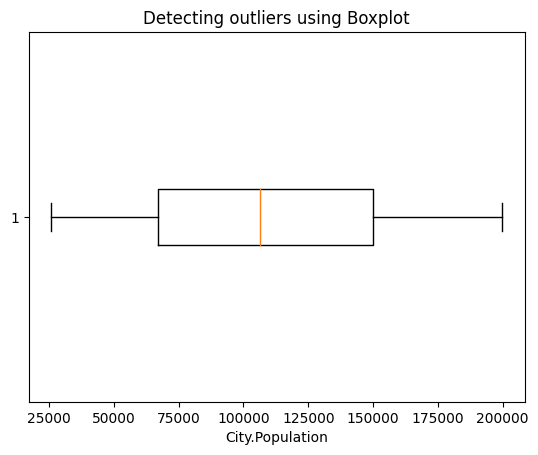

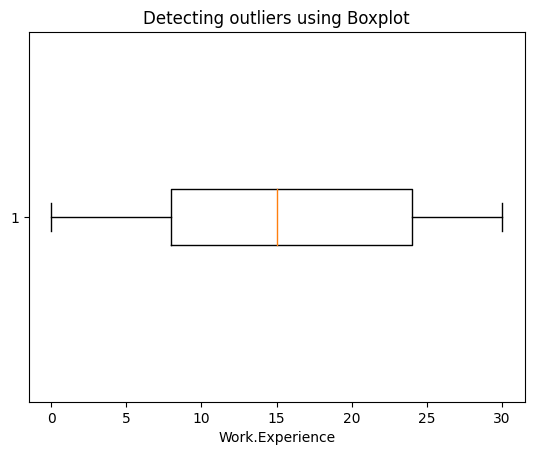

In [4]:
import matplotlib.pyplot as plt
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==  'float64':
  plt.boxplot(df[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

No outliers found

In [6]:
df.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [8]:
df['Taxable.Income'] = ['Good' if value > 30000 else 'Risky' for value in df['Taxable.Income']]

df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [9]:
#Encoding

mappings = {}
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'O':
  mappings[i] = dict(zip(df[i].unique(), range(len(df[i].unique()))))
  df[i] = df[i].map(lambda x: mappings[i][x])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,0,50047,10,0
1,1,1,0,134075,18,0
2,0,2,0,160205,30,0
3,1,0,0,193264,15,0
4,0,2,0,27533,28,1
...,...,...,...,...,...,...
595,1,1,0,39492,7,0
596,1,1,0,55369,2,0
597,0,1,0,154058,0,0
598,1,2,0,180083,17,1


In [11]:
df.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income       2
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [12]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

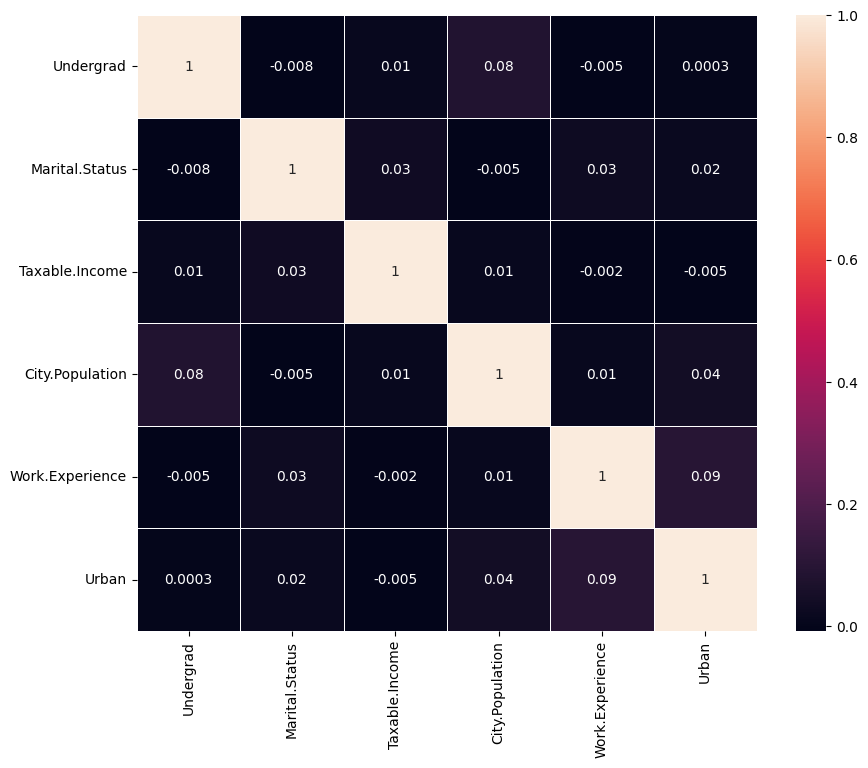

In [13]:
import seaborn as sns
plt.figure(figsize = (10, 8))
corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.1g', linewidth = 0.5)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
y = df['Taxable.Income']
x = df.drop('Taxable.Income', axis =1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [17]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
145,0,1,197422,2,0
9,1,1,155482,4,0
375,0,2,130935,2,1
523,0,1,42198,12,1
188,0,1,137569,10,1
...,...,...,...,...,...
71,0,0,105680,22,1
106,1,0,58535,20,0
270,0,2,130680,5,1
435,0,1,111774,4,0


In [18]:
x_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
110,0,0,32450,19,0
419,0,2,138074,20,1
565,0,1,31064,28,1
77,1,2,118344,26,1
181,0,1,36116,20,1
...,...,...,...,...,...
399,0,0,74497,21,1
340,1,2,54437,21,0
148,0,2,197038,21,1
494,0,0,197045,13,0


In [29]:
from sklearn.ensemble import RandomForestClassifier
radf = RandomForestClassifier()
radf = radf.fit(x_train, y_train)
predr = radf.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, predr))
print ('\n clasification report:\n', classification_report(y_test, predr))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predr))

Accuracy: 0.7666666666666667

 clasification report:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87        94
           1       0.00      0.00      0.00        26

    accuracy                           0.77       120
   macro avg       0.39      0.49      0.43       120
weighted avg       0.61      0.77      0.68       120


 confussion matrix:
 [[92  2]
 [26  0]]


In [21]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [30]:
params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [31]:
optimize_model = GridSearchCV(estimator=radf, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
optimize_model.fit(x, y)
print("Best parameters: ", optimize_model.best_params_)

Fitting 4 folds for each of 150 candidates, totalling 600 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 100}


In [32]:
from sklearn.ensemble import RandomForestClassifier
radf = RandomForestClassifier( criterion = 'gini',max_depth = 2, min_samples_leaf=5, n_estimators=100)
radf = radf.fit(x_train, y_train)
predr = radf.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, predr))
print ('\n clasification report:\n', classification_report(y_test, predr))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predr))

Accuracy: 0.7833333333333333

 clasification report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120


 confussion matrix:
 [[94  0]
 [26  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.         0.         0.         0.03846154 0.03846154 0.07692308
 0.07692308 0.11538462 0.11538462 0.15384615 0.15384615 0.23076923
 0.23076923 0.26923077 0.26923077 0.30769231 0.30769231 0.34615385
 0.34615385 0.38461538 0.38461538 0.42307692 0.42307692 0.46153846
 0.46153846 0.5        0.5        0.5        0.5        0.53846154
 0.53846154 0.61538462 0.61538462 0.65384615 0.65384615 0.69230769
 0.69230769 0.73076923 0.73076923 0.76923077 0.76923077 0.80769231
 0.80769231 0.84615385 0.84615385 0.88461538 0.88461538 0.92307692
 0.92307692 0.96153846 0.96153846 1.        ]
[0.         0.0106383  0.0212766  0.0212766  0.10638298 0.10638298
 0.15957447 0.15957447 0.18085106 0.18085106 0.25531915 0.25531915
 0.31914894 0.31914894 0.37234043 0.37234043 0.40425532 0.40425532
 0.45744681 0.45744681 0.46808511 0.46808511 0.4893617  0.4893617
 0.54255319 0.54255319 0.61702128 0.63829787 0.65957447 0.65957447
 0.72340426 0.72340426 0.74468085 0.74468085 0.75531915 0.75531915
 0.81914894 0.819

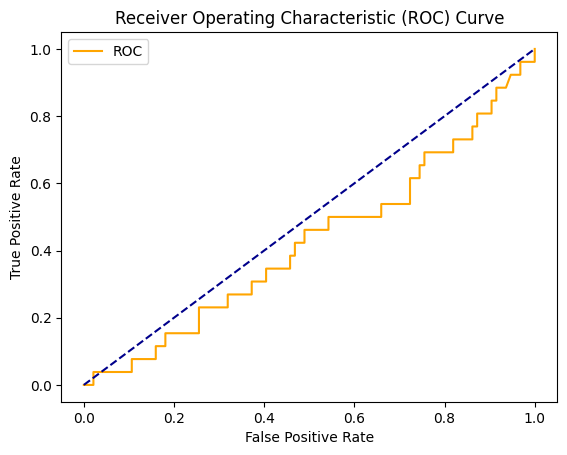

In [34]:
import numpy as np

pred_prob = radf.predict_proba(x_test)[:,1]

from sklearn import metrics
def plot_roc_curve(fpr, tpr):
 plt.plot(fpr, tpr, color='orange', label='ROC')
 plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.title('Receiver Operating Characteristic (ROC) Curve')
 plt.legend()
 plt.show()


y_true = y_test
y_scores = pred_prob
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_scores)        # Important step
print(tpr)
print(fpr)
print(thresholds)
print(metrics.roc_auc_score(y_true, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)